In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 33.1 MB/s 
     |████████████████████████████████| 6.6 MB 53.0 MB/s 
     |████████████████████████████████| 596 kB 55.9 MB/s 
     |████████████████████████████████| 86 kB 3.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead, TrainingArguments, Trainer
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  
tokenizer = AutoTokenizer.from_pretrained("dbmdz/german-gpt2")

model = AutoModelWithLMHead.from_pretrained("dbmdz/german-gpt2")

Downloading:   0%|          | 0.00/865 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:973: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/487M [00:00<?, ?B/s]

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kant.txt to kant.txt


In [ ]:
from transformers import pipeline

pipe = pipeline('text-generation', model="dbmdz/german-gpt2",
                 tokenizer="dbmdz/german-gpt2")

text = pipe("Bewusstsein ist", max_length=100)[0]["generated_text"]

print(text)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Bewusstsein ist nicht die einzige Erklärung für das, was es bedeutet, oder?
Erkennen wir uns in der Realität und im Körper-Sicht-Zeugnis?
Ja.
Sie sind nicht mehr allein.
Man sieht einen Unterschied zwischen sich und einer menschlichen Seele.
Wir haben verschiedene Menschen und können sie sehr unterschiedlich wahrnehmen.
Einige sind der Ansicht, dass man sie ohne sie nicht so wahrnehmen kann, andere sehen das nicht so.
Ich kann mich nun mit ihnen identifizieren.


In [ ]:
!tar -cvf demo.tar sample_data/

sample_data/
sample_data/anscombe.json
sample_data/README.md
sample_data/mnist_train_small.csv
sample_data/mnist_test.csv
sample_data/california_housing_test.csv
sample_data/california_housing_train.csv


In [ ]:
# datasets

# from sklearn.model_selection import train_test_split

# with open('kant.txt') as f:
#      data = f.read()
 
# train, test = train_test_split(data,test_size=0.15)

In [ ]:
# "".join(train[:100])

In [ ]:
# import re
# import json
# from sklearn.model_selection import train_test_split


# def build_text_files(data, dest_path):
#     f = open(dest_path, 'w')
#     f.write(data)

# train, test = train_test_split(data,test_size=0.15)

# build_text_files(train,'train_dataset.txt')
# build_text_files(test,'test_dataset.txt')

# print("Train dataset length: "+ str(len(train)))
# print("Test dataset length: "+ str(len(test)))

# #Train dataset length: 10361
# #Test dataset length: 1829

In [ ]:
# load datasets
from transformers import TextDataset,DataCollatorForLanguageModeling

def load_dataset(tokenizer):
    train_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path="kant.txt",
          block_size=128)

    # test_dataset = TextDataset(
    #       tokenizer=tokenizer,
    #       file_path=test_path,
    #       block_size=128)

    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False,
    )
    return train_dataset, data_collator

# train_dataset,test_dataset,data_collator = load_dataset(train_path,test_path,tokenizer)
train_dataset,data_collator = load_dataset(tokenizer)

/usr/local/lib/python3.7/dist-packages/transformers/data/datasets/language_modeling.py:58: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  FutureWarning,


In [ ]:
len(train_dataset[0])

128

In [ ]:
# training
from transformers import Trainer, TrainingArguments, AutoModelWithLMHead

model = AutoModelWithLMHead.from_pretrained("dbmdz/german-gpt2")

training_args = TrainingArguments(
    output_dir="./Xmr", #The output directory
    overwrite_output_dir=True, #overwrite the content of the output directory
    num_train_epochs=3, # number of training epochs
    per_device_train_batch_size=32, # batch size for training
    per_device_eval_batch_size=64,  # batch size for evaluation
    eval_steps = 400, # Number of update steps between two evaluations.
    save_steps=800, # after # steps model is saved
    warmup_steps=500,# number of warmup steps for learning rate scheduler
    )

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    # eval_dataset=test_dataset,
    # prediction_loss_only=True,
)

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:973: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [ ]:
trainer.train()
trainer.save_model()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 6112
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 573


Step,Training Loss
500,3.806500




Training completed. Do not forget to share your model on huggingface.co/models =)


Saving model checkpoint to ./Xmr
Configuration saved in ./Xmr/config.json
Model weights saved in ./Xmr/pytorch_model.bin


In [ ]:
!tar -cvf xmr.tar Xmr/

Xmr/
Xmr/pytorch_model.bin
Xmr/config.json
Xmr/runs/
Xmr/runs/Jun21_13-04-27_085dfd5bd129/
Xmr/runs/Jun21_13-04-27_085dfd5bd129/1655816667.9277425/
Xmr/runs/Jun21_13-04-27_085dfd5bd129/1655816667.9277425/events.out.tfevents.1655816667.085dfd5bd129.72.1
Xmr/runs/Jun21_13-04-27_085dfd5bd129/events.out.tfevents.1655816667.085dfd5bd129.72.0
Xmr/training_args.bin


In [ ]:
# test if the model knows Plato now.
from transformers import pipeline

xmr = pipeline('text-generation', model='./drive/MyDrive/Xmr', tokenizer="dbmdz/german-gpt2")

# result = xmr('Plato ist')[0]['generated_text']

In [ ]:
result = xmr('Plato ist', max_length=100)[0]['generated_text']

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
result

'Plato ist also nicht nur nicht gleichzusetzen mit demjenigen, von dem er in Anspruch genommen ist, oder mit demjenigen, von dem er es nach einer gegebenen Naturlehre ist zu demjenigen zu reden, was ich nur verstehe: entweder das Gefuehls, welches die Erscheinung, naemlich den Zustand des aeussern Gefuehls, zum Grunde legt, oder die Erfahrung, die einen solchen Zustand zur Folge hat, ist das Gefuehls, welches es nicht dem Gefuehls-'

In [ ]:
xmr('Bewusstsein ist', max_length=500)[0]['generated_text']

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Bewusstsein ist in ihm, doch auch das Bewegen, welches wir in ihm als ein Vehikel, als ein Ding, als ein Beweger, ansehen. Denn die Bewegung geschieht auf diese Art. Und mithin, so fern es durch blosses Vortrage geschieht, wird also nichts anderes als die Handlung geschehen, als was in dieser Bewegung des Begehrungsvermoegens geschehen soll, was aber niemals der Wirkung a priori, sondern nur der Beurteilung einer solchen Vermoegenseinheit zur Erzeugung der Verknuepfung desselben, oder, wie er es im Prinzip der praktischen Vernunft tut, auch durch die Erscheinung, das Begehrungsvermoegen, entgegengesetzt werden kann. Wenn aber das Begehrungsvermoegen sich auf bestimmte Arten vollstaendig in der Einbildungskraft als ein Mittel zur Erreichung eines Zwecks selbst anfaengt, so koennte ein solches Gegenstaende selbst der Grund, warum eine Absicht auf das Verhaeltnis dieser Zwecke der Einbildungskraft und des Scheins, wo notwendig in irgend einer Naturvorstellung anzutreffen ist, denn allein

In [ ]:
xmr('Ein Mensch ist', max_length=100)[0]['generated_text']

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Ein Mensch ist, mithin bei keiner Vernunftverstandesvorstellung, die Welt in ihrer Weltordnung im Grunde, eine Idee von der notwendigen Ursache, die auch den Grund der Welt selbst an sich haette, und diese Erkenntnis kann nicht in das Verhaeltniss der Natur zur Welt eingefloesst werden. Denn das Weltbild, als Idee der Weltordnung, muss ueberhaupt der Natur dienen und zwar auf den Bedingungen fuer sich und zur Zeit bestimmt bleiben, ohne dass das Bewusstsein der Natur'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts


In [ ]:
with open("kant.txt", 'r', encoding='UTF8', newline='\n') as f:
    reader = f.read()
    counts = word_count(reader)
    count_items = list(counts.items())
    count_items.sort(key=lambda item: item[1])
    sorted_count_items = count_items[::-1]


In [ ]:
words_count = [item  for item in sorted_count_items if len(item[0]) > 5]

In [ ]:
!pip freeze 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


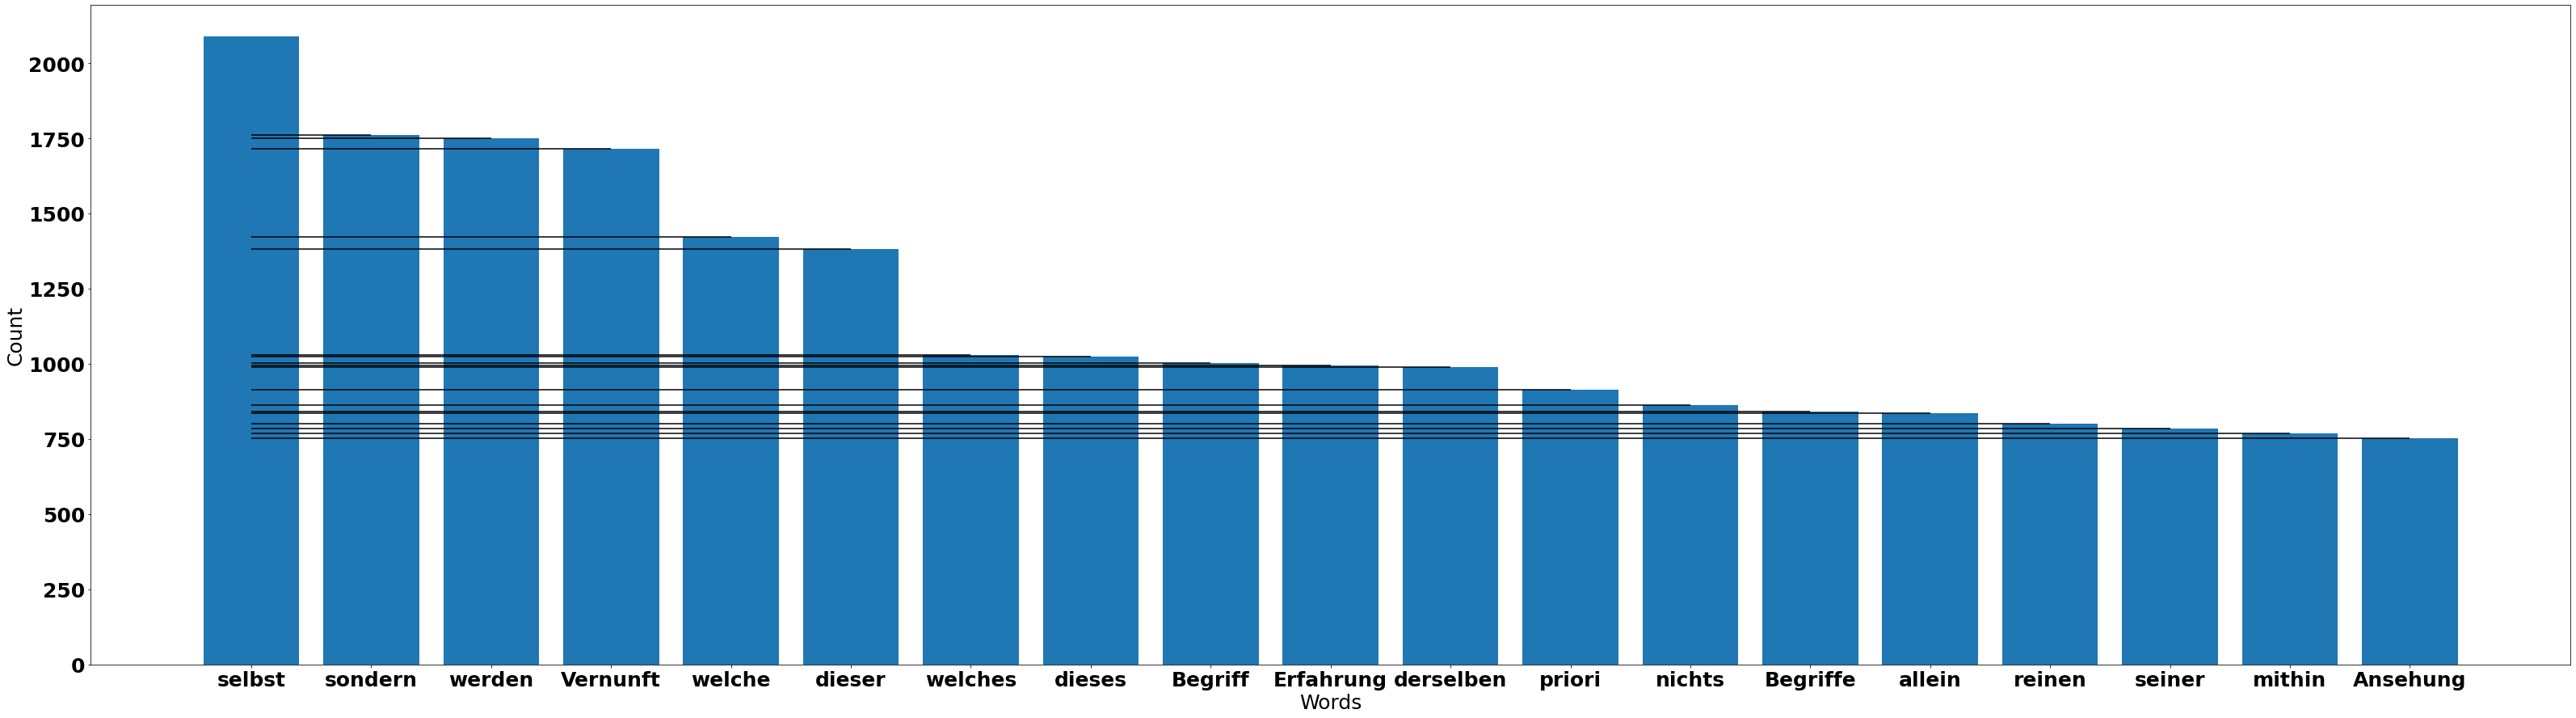

In [ ]:
import matplotlib.pyplot as plt
x, y = zip(*words_count[:19])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 25}

plt.rc('font', **font)

plt.figure(figsize=(55,15))
plt.bar(x,y) # A bar chart
plt.xlabel('Words')
plt.ylabel('Count')
for i in range(len(y)):
    plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
plt.show()

In [ ]:
# number of words
len(words_count)

33300

In [ ]:
# sum of words repeatation
sum([word_count[1] for word_count in words_count ])

236786

In [ ]:
sum_repeatation = sum([word_count[1] for word_count in words_count ])
words_count_perc = [(word_count[0], word_count[1]/sum_repeatation) for word_count in words_count ]

In [ ]:
words_count_perc[:10]

[('selbst', 0.008822312129940115),
 ('sondern', 0.007441318321184529),
 ('werden', 0.007399086094617081),
 ('Vernunft', 0.007242826856317519),
 ('welche', 0.006009645840548005),
 ('dieser', 0.005840716934278209),
 ('welches', 0.004345696113790511),
 ('dieses', 0.004328803223163532),
 ('Begriff', 0.004231669102058399),
 ('Erfahrung', 0.004202106543461185)]

In [ ]:
!python --version


Python 3.7.13


In [ ]:
!pip freeze

absl-py==1.1.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.2
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.7.7
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.7
certifi==2022.6.15
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.5
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.30
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.5.1
distribu